In [5]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

In [15]:
image = cv2.imread('moon.tif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
x_kernel = np.array([1, -2, 1])
y_kernel = np.array([[1],
                     [2],
                     [3]])
lap_kernel = x_kernel + y_kernel

In [17]:
lap_kernel

array([[ 2, -1,  2],
       [ 3,  0,  3],
       [ 4,  1,  4]])

In [18]:
def convolve(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (roi * kernel).sum()
            output[y - pad, x - pad] = k
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

In [19]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# Laplacian kernel 
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

In [20]:
convoleOutput = convolve(gray, laplacian)
opencvOutput = cv2.filter2D(gray, -1, laplacian)

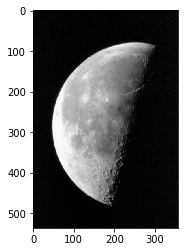

In [21]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

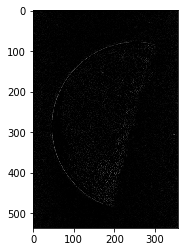

In [22]:
plt.imshow(convoleOutput, cmap='gray', vmin=0, vmax=255)

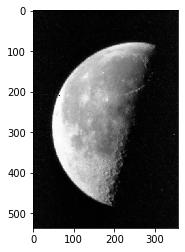

In [24]:
plt.imshow(convoleOutput+gray, cmap='gray', vmin=0, vmax=255)